<a href="https://colab.research.google.com/github/dhirajsuvarna/nlp_text_classification/blob/master/hackathon/ULMFit_Drug_Review_Classification_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading DataSet from Google Drive

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.text import * 

#Load the Traning and Validation Dataset
df_train = pd.read_csv('/content/drive/My Drive/Projects/AnalyticsHackathon/dataset/drugsComTrain_raw.csv')
df_valid = pd.read_csv('/content/drive/My Drive/Projects/AnalyticsHackathon/dataset/drugsComTest_raw.csv')

##Removing Empty Cells and Invalid Cells





In [4]:
df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

#print(df_train[df_train['condition'].isna()])
print(f"#NaN in Train: {df_train[df_train['condition'].isna()].shape}")
print(f"#NaN in Validation: {df_valid[df_valid['condition'].isna()].shape}")

#Reomve the rows with empty(nan) 'condition' or empty(nan) 'review'
print("Removing rows with nan values...")
df_train = df_train.dropna()
df_valid = df_valid.dropna()



#Train Examples: (161297, 2)
#Validation Examples: (53766, 2)
#NaN in Train: (899, 2)
#NaN in Validation: (295, 2)
Removing rows with nan values...


In [5]:
#print(df_train[df_train['condition'].str.contains('users found this comment helpful')])
print(f"#'users found this comment useful' in Train: {df_train[df_train['condition'].str.contains('users found this comment helpful')].shape}")
print(f"#'users found this comment useful'in Validation: {df_valid[df_valid['condition'].str.contains('users found this comment helpful')].shape}")

#Remove the rows where 'condition' is "users found this comment helpful"
print("Removing the rows where condition is 'users found this comment helpful'")
df_train = df_train[~df_train['condition'].str.contains('users found this comment helpful')]
df_valid = df_valid[~df_valid['condition'].str.contains('users found this comment helpful')]

df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

#'users found this comment useful' in Train: (900, 2)
#'users found this comment useful'in Validation: (271, 2)
Removing the rows where condition is 'users found this comment helpful'
#Train Examples: (159498, 2)
#Validation Examples: (53200, 2)


##Remove Mismatch of Classes between Validation and Training Set

In [6]:
#Number of classes present in the training and validation set
targets_train = df_train['condition'].unique()
targets_valid = df_valid['condition'].unique()
print(f"#Target Classes in Train: {len(targets_train)}")
print(f"#Target Classes in Validation: {len(targets_valid)}")

targets_only_in_valid = [item for item in targets_valid if item not in targets_train]
print(f"#Targets in Validation but not in Training: {len(targets_only_in_valid)}")


#Target Classes in Train: 811
#Target Classes in Validation: 664
#Targets in Validation but not in Training: 25


In [7]:
#Remove the items from Validation Set for which classes are present in Validation but not present in the Training Set
#print(f"#Invalid Validation examples: {df_valid[df_valid['condition'].isin(targets_only_in_valid)].shape}")

df_valid = df_valid[~df_valid['condition'].isin(targets_only_in_valid)]

df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

#Train Examples: (159498, 2)
#Validation Examples: (53161, 2)


#Targets in Training but not in Validation: 172
Training Examples only in Training Set: (0, 2)
Distribution of Training Examples for those classes


Text(0.5, 0, '#Classes')

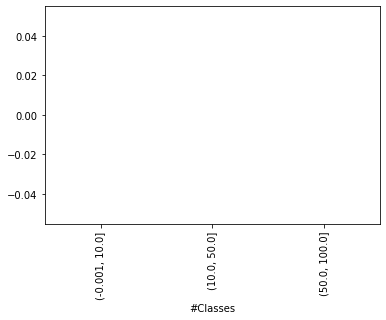

In [24]:
#Check the Classes which are present in the Training Set but not present in the Validation Set
targets_only_in_train = [item for item in targets_train if item not in targets_valid]
print(f"#Targets in Training but not in Validation: {len(targets_only_in_train)}")

df_only_in_train = df_train[df_train['condition'].isin(targets_only_in_train)]
print(f"Training Examples only in Training Set: {df_only_in_train.shape}")



In [25]:
#Let us see the distribution of Traning Examples for the above classes
print("Distribution of Training Examples for those classes")
only_in_train_bins = [0, 10, 50, 100]
out_only_in_train = pd.cut(df_only_in_train['condition'].value_counts(), bins=only_in_train_bins, include_lowest =True)
out_only_in_train = out_only_in_train.value_counts().reindex(out_only_in_train.cat.categories)
axes = out_only_in_train.plot.bar()
axes.set_xlabel('#Classes')
# axes = df_only_in_train['condition'].value_counts().plot.hist()
# axes.set_xlabel('#Training Examples')
# axes.set_ylabel('#Conditions')

ModuleNotFoundError: ignored

In [16]:
#We can see that there are 419 Training examples for which 172 classes are present in Traning set but not the validation set
#To make the Traning and Validation Set Balanced, removing those 419 Traning Examples
print("Making Training Set and Validation Set balanced in terms of #classes") 
df_train = df_train[~df_train['condition'].isin(targets_only_in_train)]

df_train = df_train[['condition', 'review']]
df_valid = df_valid[['condition', 'review']]
print (f"#Train Examples: {df_train.shape}")
print (f"#Validation Examples: {df_valid.shape}")

#Train Examples: (159079, 2)
#Validation Examples: (53161, 2)


Let us see the Distribution of Training Examples
(-0.001, 10.0]        237
(10.0, 50.0]          178
(50.0, 100.0]          75
(100.0, 500.0]         89
(500.0, 5000.0]        55
(5000.0, 10000.0]       4
(10000.0, 20000.0]      0
(20000.0, 30000.0]      1
Name: condition, dtype: int64


Text(0.5, 0, '#Classes')

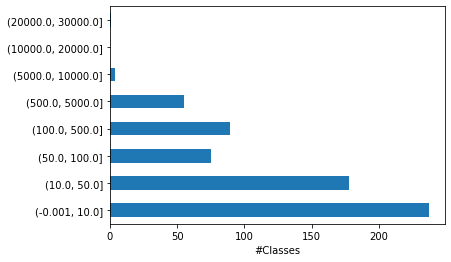

In [26]:
print("Let us see the Distribution of Training Examples")
train_bins = [0, 10, 50, 100, 500, 5000, 10000, 20000, 30000]
out_train = pd.cut(df_train['condition'].value_counts(), bins=train_bins, include_lowest =True)
out_train = out_train.value_counts().reindex(out_train.cat.categories)
print(out_train)
axes = out_train.plot.barh()
axes.set_xlabel('#Classes')

#Analysis of Precision and Recall